-------------------------------------------------------------------
# Homework set 9 - solution

   * **Author**: Balint Szoke
   * **UniID**: bs2574

------------------------------------------------------------------

In [1]:
%matplotlib inline

import numpy as np
import warnings
import matplotlib.pyplot as plt

In [2]:
class LQ_asset_pricing:
    
    """
    This class takes elements of the LQ asset pricing problem and calculates the 
    price by solving a discrete Lyapunov equation 
    
    The pricing equation is
        p_t = beta * E_t[d_{t+1} + p_{t+1}]
    
    where
        x_{t+1} = A x_t + C w_{t+1}
        d_t     = (x_t)'D x_t
       
    
    Arguments
    ----------
    A    : numpy.array(n, n)
    C    : numpy.array(n, k)
    D    : numpy.array(n, n)
    beta : scalar
    
    """
    
    def __init__(self, A, C, D, beta):
        self.A, self.C, self.D, self.beta = A, C, D, beta
        self.n, self.k = self.C.shape
        
        # Check for stability
        if np.any(abs(np.linalg.eigvals(A)) >= 1 / np.sqrt(beta)):
                warnings.warn('Spectral radius is larger than 1/sqrt(beta). \
                Sufficient condition for uniqe solution is not satisfied!')
        
        # Define terms for the Lyapunov operator
        self.M = self.beta * self.A.T @ self.D @ self.A
        self.Lambda = np.sqrt(self.beta) * self.A.T
            
    def L(self, P):
        """
        Lyapunov operator
        
        """
        return self.Lambda @ P @ self.Lambda.T + self.M
    
    
    def solve_lyapunov(self, tol = .1e-5):
        """
        Solve for the unique globally stable fixed point of L by successive iteration 
        
        """
        P0 = np.eye(self.n)
        diff = 1 + tol
        
        while diff > tol:
            P1 = self.L(P0)
            diff = np.linalg.norm(P1 - P0, 2)
            P0 = P1

        return P1
    
    
    def price(self, x):
        """
        Calculating the price for a given x vector
        
        """
        
        P_star = self.solve_lyapunov()
        delta_star = (self.beta/(1 - self.beta)) * np.trace(self.C.T @ (self.D + P_star) @ self.C)
        
        return x.T @ P_star @ x + delta_star

### Testing

In [3]:
A = np.array([[ .8, -.1], 
              [-.1,  .8]])
C = np.eye(2)
D = np.eye(2)
beta = .9

AP = LQ_asset_pricing(A, C, D, beta)

In [4]:
AP.price(np.asarray([1, 1]))

50.888309496220991

### Plotting

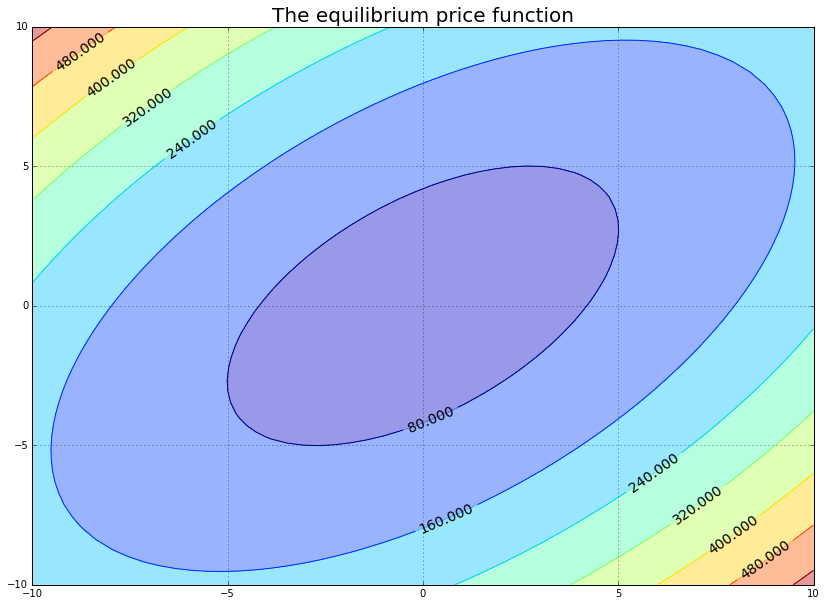

In [5]:
numb_of_grid = 50
x = np.linspace(-10.0, 10.0, numb_of_grid)
y = np.linspace(-10.0, 10.0, numb_of_grid)

X, Y = np.meshgrid(x, y)
Z = np.zeros((numb_of_grid, numb_of_grid))

for i in range(numb_of_grid):
    for j in range(numb_of_grid):
        Z[i][j] = AP.price(np.array([X[i][j], Y[i][j]]))
        
plt.figure(figsize = (14, 10))
plt.contourf(X, Y, Z, alpha = .4)
plt.clabel(plt.contour(X, Y, Z), inline = 1, fontsize = 14, colors = 'black')
plt.title('The equilibrium price function', fontsize = 20)
plt.grid(True)
